In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

img1 = cv2.imread("../Imgs/pinguim.jpg", 1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [2]:
img1_gs = cv2.imread("../Imgs/pinguim.jpg", 0)

In [3]:
kernels = {
    'retangulo': cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)),
    'elipse': cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),
    'cruz': cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
}

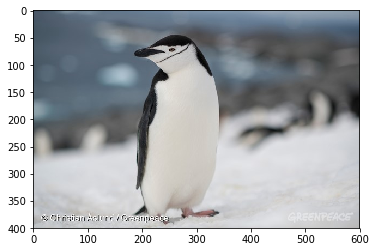

In [4]:
plt.imshow(img1)

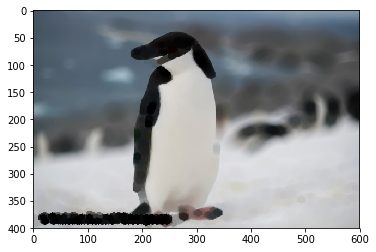

In [5]:
imagem_erosao = cv2.erode(img1,kernels['elipse'],iterations = 3)
plt.imshow(imagem_erosao)

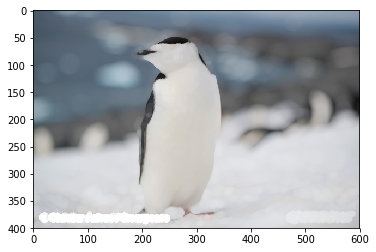

In [6]:
imagem_dilate = cv2.dilate(img1,kernels['elipse'],iterations = 2)
plt.imshow(imagem_dilate)

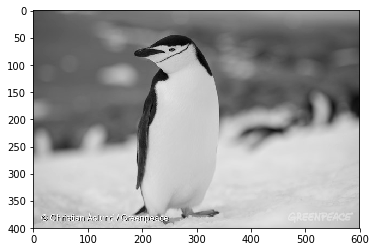

In [7]:
plt.imshow(img1_gs, cmap = "gray")

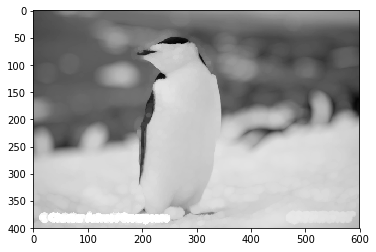

In [8]:
imagem_dilate = cv2.dilate(img1_gs,kernels['elipse'],iterations = 2)
plt.imshow(imagem_dilate, cmap = "gray")

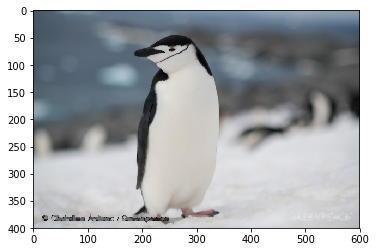

In [9]:
#buracos brancos ou pretos, ver github da aula
imagem_op = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernels["elipse"])
plt.imshow(imagem_op)

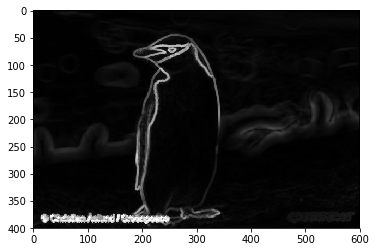

In [10]:
imagem_grad = cv2.morphologyEx(img1_gs, cv2.MORPH_GRADIENT, kernels["elipse"])
plt.imshow(imagem_grad, cmap = "gray")

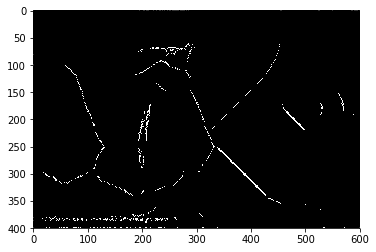

In [11]:
#esqueletização

import cv2
import numpy as np

img = img1_gs


size = np.size(img)
skel = np.zeros(img.shape,np.uint8)

ret,img = cv2.threshold(img,50,200,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
done = False

while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True

plt.imshow(skel, cmap = "gray")
        
# cv2.imshow("skel",skel)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [12]:
img = img1_gs

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def iteracoes(i=1):
    
    fig, ax = plt.subplots(1, 3, figsize=(32, 32))
    fig.subplots_adjust(hspace=0, wspace=0)

    ax[0].set_title("Retângulo - %d iterações" % (i), fontsize=48)
    ax[0].imshow(img - cv2.erode(img,kernels['retangulo'],iterations = i), cmap='gray')
    
    ax[1].set_title("Elipse - %d iterações" % (i), fontsize=48)
    ax[1].imshow(img - cv2.erode(img,kernels['elipse'],iterations = i), cmap='gray')
    
    ax[2].set_title("Cruz - %d iterações" % (i), fontsize=48)
    ax[2].imshow(img - cv2.erode(img,kernels['cruz'],iterations = i), cmap='gray')

In [13]:
c = interactive(iteracoes, i=(0,5))
display(c)

interactive(children=(IntSlider(value=1, description='i', max=5), Output()), _dom_classes=('widget-interact',)…

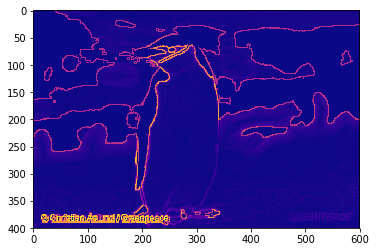

In [31]:
plt.imshow(img - cv2.erode(img,kernels['retangulo'],iterations = 1), cmap='plasma')

In [14]:
cv2.IMREAD_GRAYSCALE, cv2.IMREAD_COLOR, cv2.IMREAD_UNCHANGED

(0, 1, -1)

## <center> <i> 2 Parte

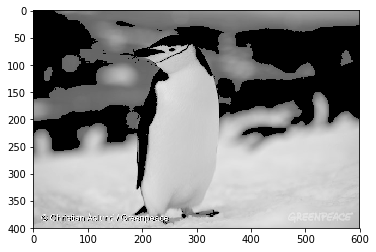

In [15]:
ret, thresh1 = cv2.threshold(img1_gs,100,200,cv2.THRESH_TOZERO)
plt.imshow(thresh1, cmap = "gray")

In [16]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

img = thresh1


f = cv2.dilate

def iteracoes(i=1):
    
    fig, ax = plt.subplots(1, 3, figsize=(32, 32))
    fig.subplots_adjust(hspace=0, wspace=0)
    
    
    ax[0].set_title("Retângulo - %d iterações" % (i), fontsize=48)
    ax[0].imshow(f(img,kernels['retangulo'],iterations = i), cmap='gray')
    
    ax[1].set_title("Elipse - %d iterações" % (i), fontsize=48)
    ax[1].imshow(f(img,kernels['elipse'],iterations = i), cmap='gray')
    
    ax[2].set_title("Cruz - %d iterações" % (i), fontsize=48)
    ax[2].imshow(f(img,kernels['cruz'],iterations = i), cmap='gray')

In [17]:
c = interactive(iteracoes, i=(0,10))
display(c)

interactive(children=(IntSlider(value=1, description='i', max=10), Output()), _dom_classes=('widget-interact',…

In [18]:
def skel(img, kernel):
    size = np.size(img)
    skel = np.zeros(img.shape,np.uint8)
    ret,img = cv2.threshold(img,127,255,0)
    element = kernel
    done = False

    while(not done):
        eroded = cv2.erode(img,element)
        temp = cv2.dilate(eroded,element)
        temp = cv2.subtract(img,temp)
        skel = cv2.bitwise_or(skel,temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if (zeros == size):
            done = True
    
    return skel

In [19]:
def iteracoes(i=1):
    fig, ax = plt.subplots(1, 3, figsize=(32, 32))
    fig.subplots_adjust(hspace=0, wspace=0)

    ax[0].set_title("Retângulo", fontsize=48)
    ax[0].imshow(skel(img, cv2.getStructuringElement(cv2.MORPH_RECT,(i, i))), cmap='gray')

    ax[1].set_title("Elipse", fontsize=48)
    ax[1].imshow(skel(img, cv2.getStructuringElement(cv2.MORPH_RECT,(i, i))), cmap='gray')

    ax[2].set_title("Cruz", fontsize=48)
    ax[2].imshow(skel(img, cv2.getStructuringElement(cv2.MORPH_RECT,(i, i))), cmap='gray')

In [20]:
c = interactive(iteracoes, i=(4,10))
display(c)

interactive(children=(IntSlider(value=4, description='i', max=10, min=4), Output()), _dom_classes=('widget-int…

# <center> <i> Adaptive Tresholding

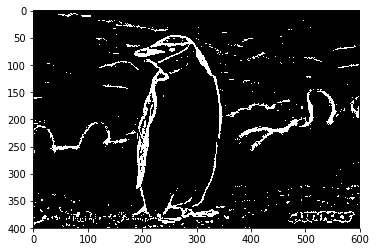

In [21]:
aux = cv2.medianBlur(img1_gs,5)

th3 = cv2.adaptiveThreshold(aux,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)

plt.imshow(th3, cmap = "gray")

# <center> <i> Color Maps

When img1 has shape (M,N,3) or (M,N,4), the values in img1 are interpreted as RGB or RGBA values. In this case the cmap is ignored. Per the help(plt.imshow) docstring:

cmap : ~matplotlib.colors.Colormap, optional, default: None

If None, default to rc image.cmap value. cmap is ignored when  X has RGB(A) information

However, if img were an array of shape (M,N), then the cmap controls the colormap used to display the values.

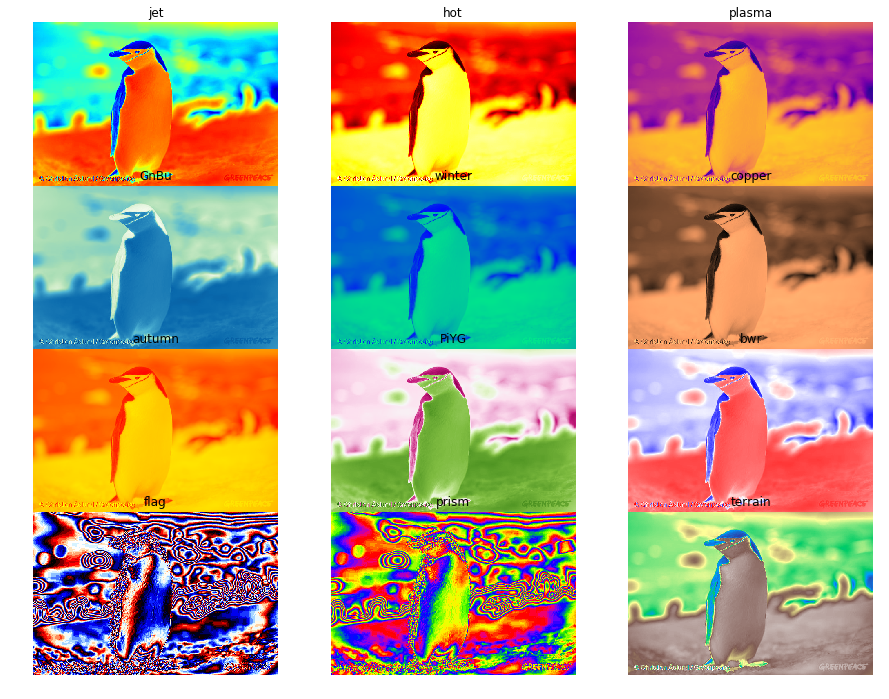

In [22]:
fig, ax = plt.subplots(4, 3, figsize=(16, 12))
fig.subplots_adjust(hspace=0, wspace=0)

[axi.set_axis_off() for axi in ax.ravel()]

lst = [
        "jet", "hot", "plasma",
        "Greys", "GnBu", "winter", 
        "copper", "cool", "autumn",
        "PiYG", "bwr", "PuOr",
        "flag", "prism", "terrain"
    
      ]

for x in range(ax.shape[0]):
    for y in range(ax.shape[1]):
        curr = x * ax.shape[0] + y
        #print(ax.shape[0], ax.shape[1], curr)
        ax[x][y].set_title(lst[curr])
        ax[x][y].imshow(img1_gs, cmap = lst[curr])


In [23]:
ax.shape

(4, 3)